### Step 0: Imports and Reading Data

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.dates as mdates
from random import randint
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")


In [121]:
df = pd.read_csv('../data/csv/US Raw Events.csv')

### Step 1: Data Understanding

#### Shape of Data and Descriptive Stats

In [122]:
df.shape

(96655, 77)

In [123]:
df.head(5)

,EVENT_ID,EVENT_NAME,EVENT_NOTES,EVENT_INFO,EVENT_STATUS,EVENT_START_DATETIME,EVENT_END_DATETIME,EVENT_START_LOCAL_DATE,EVENT_START_LOCAL_TIME,ONSALE_START_DATETIME,ONSALE_END_DATETIME,CLASSIFICATION_SEGMENT,CLASSIFICATION_GENRE,CLASSIFICATION_SUB_GENRE,EVENT_IMAGE_URL,MIN_PRICE,MAX_PRICE,CURRENCY,ATTRACTION_NAME,ATTRACTION_ID,ATTRACTION_IMAGE_URL,VENUE_NAME,VENUE_ID,VENUE_STREET,VENUE_CITY,VENUE_STATE_CODE,VENUE_COUNTRY_CODE,VENUE_LATITUDE,VENUE_LONGITUDE,VENUE_ZIP_CODE,VENUE_TIMEZONE,ATTRACTION_URL,VENUE_URL,PRIMARY_EVENT_URL,RESALE_EVENT_URL,PRESALE_NAME,PRESALE_DATETIME_RANGE,LEGACY_EVENT_ID,LEGACY_VENUE_ID,LEGACY_ATTRACTION_ID,PRESALE_NAME.1,PRESALE_DESCRIPTION,PRESALE_START_DATETIME,PRESALE_END_DATETIME,SOURCE,CLASSIFICATION_TYPE,CLASSIFICATION_SUB_TYPE,PROMOTER_ID,PROMOTER_NAME,CLASSIFICATION_SEGMENT_ID,CLASSIFICATION_GENRE_ID,CLASSIFICATION_SUB_GENRE_ID,CLASSIFICATION_TYPE_ID,CLASSIFICATION_SUB_TYPE_ID,ATTRACTION_CLASSIFICATION_SEGMENT_ID,ATTRACTION_CLASSIFICATION_SEGMENT,ATTRACTION_CLASSIFICATION_GENRE_ID,ATTRACTION_CLASSIFICATION_GENRE,ATTRACTION_CLASSIFICATION_SUB_GENRE_ID,ATTRACTION_CLASSIFICATION_SUB_GENRE,ATTRACTION_CLASSIFICATION_TYPE_ID,ATTRACTION_CLASSIFICATION_TYPE,ATTRACTION_CLASSIFICATION_SUB_TYPE_ID,ATTRACTION_CLASSIFICATION_SUB_TYPE,MIN_PRICE_WITH_FEES,MAX_PRICE_WITH_FEES,TRANSACTABLE,HOT_EVENT,ACCESSIBLE_SEATING_DETAIL,ADA_PHONE,ADA_CUSTOM_COPY,ADA_HOURS,ACCESSIBILITY_INFO,API_ONSALE_START_DATETIME,PLEASE_NOTE,IMPORTANT_INFORMATION,EVENT_END_LOCAL_DATE
0,rZ7HnEZ1AfF6aK,Tonight at the Improv!,NaN,"DO NOT PURCHASE TICKETS FROM ANYONE OR ANY OTHER SITE OTHER THAN IMPROV.COM TICKET RESALE IS STRICTLY PROHIBITED.TICKETS SUSPECTED OF BEING PURCHASED FOR THE SOLE PURPOSE OF RESELLING MAY BE CANCELLED AT THE DISCRETION OF THE HOLLYWOOD IMPROV.EVENT INFO:There is a two-item minimum purchase requirement in the showroom for all guests. Seating is general admission, first-come, first-served, with the exception of groups and premium booths.No cell phone use, photography or video recording is permitted during performances.All sales are final.MISCELLANOUS:For group sales info, e-mail our Events Manager to learn about special menu options and reserved seating.Additional questions may be addressed in our Frequently Asked Questions.For further assistance, contact Hollywood Improv.",onsale,2025-03-02T05:30:00Z,NaN,2025-03-01,21:30,2025-01-20T21:00:00Z,2025-03-02T06:00:00Z,Undefined,NaN,NaN,https://i.ticketweb.com/i/00/12/86/60/03_Edp.jpg?v=4,29.34,29.34,USD,NaN,NaN,NaN,Hollywood Improv (The Main Room),rZ7HnEZ178sj4,8162 Melrose Avenue,Hollywood,CA,US,34.083418,-118.366556,90046,America/Los_Angeles,NaN,https://www.ticketweb.com/venue/hollywood-improv-the-main-room--hollywood-ca/431715,https://www.ticketweb.com/event/tonight-at-the-improv-hollywood-improv-the-main-room-tickets/14207253,NaN,NaN,NaN,rZ7HnEZ1AfF6aK,NaN,NaN,NaN,NaN,NaN,NaN,ticketweb,Undefined,Undefined,NaN,NaN,KZFzniwnSyZfZ7v7nl,NaN,NaN,KZAyXgnZfZ7v7nI,KZFzBErXgnZfZ7v7lJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,2025-01-20T22:00:00Z,"This event is 21 and over. Any ticket holder unable to present valid identification indicating that they are at least 21 years of age will not be admitted to this event, and will not be eligible for a refund. By purchasing tickets to this event, you are authorizing this charge and agreeing to our terms and conditions herein. • ALL SALES ARE FINAL, unless event is cancelled. • Comics and set times are subject to change. • No refunds, transfers, or exchanges. Ticket resales are not permitted. • Tickets prices and fees are “market-priced” and may fluctuate. • Mandatory two-item minimum purchase per person in the showroom. • No photography, videography, filming, or recording during the show. • Valid photo ID and credit card used for purchase are required to pick up tickets. • No smoking or vaping. • We reserve the right to deny/refuse entry to or remove parties who are deemed a distraction to other gu

In [124]:
df.columns

Index(['EVENT_ID', 'EVENT_NAME', 'EVENT_NOTES', 'EVENT_INFO', 'EVENT_STATUS',
       'EVENT_START_DATETIME', 'EVENT_END_DATETIME', 'EVENT_START_LOCAL_DATE',
       'EVENT_START_LOCAL_TIME', 'ONSALE_START_DATETIME',
       'ONSALE_END_DATETIME', 'CLASSIFICATION_SEGMENT', 'CLASSIFICATION_GENRE',
       'CLASSIFICATION_SUB_GENRE', 'EVENT_IMAGE_URL', 'MIN_PRICE', 'MAX_PRICE',
       'CURRENCY', 'ATTRACTION_NAME', 'ATTRACTION_ID', 'ATTRACTION_IMAGE_URL',
       'VENUE_NAME', 'VENUE_ID', 'VENUE_STREET', 'VENUE_CITY',
       'VENUE_STATE_CODE', 'VENUE_COUNTRY_CODE', 'VENUE_LATITUDE',
       'VENUE_LONGITUDE', 'VENUE_ZIP_CODE', 'VENUE_TIMEZONE', 'ATTRACTION_URL',
       'VENUE_URL', 'PRIMARY_EVENT_URL', 'RESALE_EVENT_URL', 'PRESALE_NAME',
       'PRESALE_DATETIME_RANGE', 'LEGACY_EVENT_ID', 'LEGACY_VENUE_ID',
       'LEGACY_ATTRACTION_ID', 'PRESALE_NAME.1', 'PRESALE_DESCRIPTION',
       'PRESALE_START_DATETIME', 'PRESALE_END_DATETIME', 'SOURCE',
       'CLASSIFICATION_TYPE', 'CLASSIFICATION_SUB

In [125]:
print(df.dtypes)



EVENT_ID                     object
EVENT_NAME                   object
EVENT_NOTES                  object
EVENT_INFO                   object
EVENT_STATUS                 object
                              ...  
ACCESSIBILITY_INFO           object
API_ONSALE_START_DATETIME    object
PLEASE_NOTE                  object
IMPORTANT_INFORMATION        object
EVENT_END_LOCAL_DATE         object
Length: 77, dtype: object


In [126]:
df.describe()

,MIN_PRICE,MAX_PRICE,VENUE_LATITUDE,VENUE_LONGITUDE,RESALE_EVENT_URL,PRESALE_NAME,PRESALE_DATETIME_RANGE,LEGACY_VENUE_ID,MIN_PRICE_WITH_FEES,MAX_PRICE_WITH_FEES
count,57192.000000,57192.000000,96589.000000,96589.000000,0.0,0.0,0.0,64392.000000,0.0,0.0
mean,44.103389,137.786942,37.591438,-94.577368,NaN,NaN,NaN,217224.224422,NaN,NaN
std,40.744637,417.955852,4.835431,19.346673,NaN,NaN,NaN,159759.121437,NaN,NaN
min,0.000000,0.000000,-87.713192,-159.371111,NaN,NaN,NaN,6.000000,NaN,NaN
25%,24.500000,35.250000,35.820643,-115.171478,NaN,NaN,NaN,57759.000000,NaN,NaN
50%,38.160000,75.000000,37.795508,-87.953513,NaN,NaN,NaN,189520.000000,NaN,NaN
75%,55.000000,129.000000,40.759300,-75.599090,NaN,NaN,NaN,376840.000000,NaN,NaN
max,3216.000000,21000.000000,64.503700,122.269633,NaN,NaN,NaN,491609.000000,NaN,NaN


#### Data Cleaning

In [127]:
# remove unneeded columns 

df = df[['EVENT_ID', 'EVENT_NAME', #'EVENT_NOTES', 'EVENT_INFO', 'EVENT_STATUS',
       #'EVENT_START_DATETIME', 'EVENT_END_DATETIME', 
       'EVENT_START_LOCAL_DATE',
       #'EVENT_START_LOCAL_TIME', 
       #'ONSALE_START_DATETIME',
       #'ONSALE_END_DATETIME', 
        'CLASSIFICATION_SEGMENT', # 'CLASSIFICATION_GENRE',
       #'CLASSIFICATION_SUB_GENRE', #'EVENT_IMAGE_URL', 
       #'MIN_PRICE', 
         'MAX_PRICE']].copy()
       #,'VENUE_CITY', 'CURRENCY', 'ATTRACTION_NAME', 'ATTRACTION_ID', 'ATTRACTION_IMAGE_URL',
       #'VENUE_NAME', 'VENUE_ID', 'VENUE_STREET', 
       #'VENUE_STATE_CODE', #'VENUE_COUNTRY_CODE', 
       #'VENUE_LATITUDE',
       #'VENUE_LONGITUDE', 'VENUE_ZIP_CODE', 'VENUE_TIMEZONE', #'ATTRACTION_URL',
       #'VENUE_URL', 'PRIMARY_EVENT_URL', 'RESALE_EVENT_URL', 'PRESALE_NAME',
       #'PRESALE_DATETIME_RANGE', 'LEGACY_EVENT_ID', 'LEGACY_VENUE_ID',
       #'LEGACY_ATTRACTION_ID', 'PRESALE_NAME.1', 'PRESALE_DESCRIPTION',
       #'PRESALE_START_DATETIME', 'PRESALE_END_DATETIME', 'SOURCE',
       #'CLASSIFICATION_TYPE', 'CLASSIFICATION_SUB_TYPE', 'PROMOTER_ID',
       #'PROMOTER_NAME', #'CLASSIFICATION_SEGMENT_ID', 'CLASSIFICATION_GENRE_ID',
       #'CLASSIFICATION_SUB_GENRE_ID', 'CLASSIFICATION_TYPE_ID',
      # 'CLASSIFICATION_SUB_TYPE_ID', 'ATTRACTION_CLASSIFICATION_SEGMENT_ID',
       #'ATTRACTION_CLASSIFICATION_SEGMENT',
       #'ATTRACTION_CLASSIFICATION_GENRE_ID', 'ATTRACTION_CLASSIFICATION_GENRE',
       #'ATTRACTION_CLASSIFICATION_SUB_GENRE_ID',
       #'ATTRACTION_CLASSIFICATION_SUB_GENRE',
      # 'ATTRACTION_CLASSIFICATION_TYPE_ID', 'ATTRACTION_CLASSIFICATION_TYPE',
       #'ATTRACTION_CLASSIFICATION_SUB_TYPE_ID',
       #'ATTRACTION_CLASSIFICATION_SUB_TYPE', 'MIN_PRICE_WITH_FEES',
       #'MAX_PRICE_WITH_FEES', 
       #'TRANSACTABLE', 'HOT_EVENT',
       #'ACCESSIBLE_SEATING_DETAIL', 'ADA_PHONE', 'ADA_CUSTOM_COPY',
       #'ADA_HOURS', 'ACCESSIBILITY_INFO', 'API_ONSALE_START_DATETIME',
       #'PLEASE_NOTE', 'IMPORTANT_INFORMATION', 'EVENT_END_LOCAL_DATE'

df.head(5)

,EVENT_ID,EVENT_NAME,EVENT_START_LOCAL_DATE,CLASSIFICATION_SEGMENT,MAX_PRICE
0,rZ7HnEZ1AfF6aK,Tonight at the Improv!,2025-03-01,Undefined,29.34
1,rZ7HnEZ1AfF6aN,Tonight at the Improv!,2025-03-08,Undefined,29.34
2,rZ7HnEZ1AfF6aS,Tonight at the Improv!,2025-03-29,Undefined,29.34
3,rZ7HnEZ1AfF6ad,Tonight at the Improv!,2025-03-07,Undefined,19.04
4,G5ezZb8MgIPuh,"Cirque du Soleil : ""O""",2025-05-10,Arts & Theatre,276.14


In [128]:
# rename columns
df = df.rename(columns = {'EVENT_ID':'Event_ID', 'EVENT_NAME':'Event_Name', 'EVENT_START_LOCAL_DATE':'Event_Start_Date', 'CLASSIFICATION_SEGMENT':'Classification', 
                     'CLASSIFICATION_GENRE':'Genre', 'CLASSIFICATION_SUB_GENRE':'Sub_Genre',
                     'MIN_PRICE':'Min_Price','MAX_PRICE':'Max_Price'})

df.head(5)

,Event_ID,Event_Name,Event_Start_Date,Classification,Max_Price
0,rZ7HnEZ1AfF6aK,Tonight at the Improv!,2025-03-01,Undefined,29.34
1,rZ7HnEZ1AfF6aN,Tonight at the Improv!,2025-03-08,Undefined,29.34
2,rZ7HnEZ1AfF6aS,Tonight at the Improv!,2025-03-29,Undefined,29.34
3,rZ7HnEZ1AfF6ad,Tonight at the Improv!,2025-03-07,Undefined,19.04
4,G5ezZb8MgIPuh,"Cirque du Soleil : ""O""",2025-05-10,Arts & Theatre,276.14


In [129]:
# drop duplicates and undefined data

df.isna().sum()
df = df.dropna()
df = df[df.Classification != 'Undefined']
df = df[df.Max_Price != 0.00]
df.head()

,Event_ID,Event_Name,Event_Start_Date,Classification,Max_Price
4,G5ezZb8MgIPuh,"Cirque du Soleil : ""O""",2025-05-10,Arts & Theatre,276.14
5,1avjZbx8ouIZd271,The Mentalist,2025-08-25,Arts & Theatre,59.98
6,vv1keZv-4YGA1U7Bv,Gutfeld Live '25 Featuring Greg Gutfeld & special guest Tom Shillue,2025-06-07,Arts & Theatre,89.50
7,k7vGFb8zt7yQJ,Irish Celebration Starring Andy Cooney,2025-03-02,Music,79.50
8,15vjZbx8KayCZ,The Mentalist,2025-11-07,Arts & Theatre,59.98


In [130]:
# change event start date to datetime
df.Event_Start_Date = pd.to_datetime(df.Event_Start_Date)
df.dtypes

Event_ID                    object
Event_Name                  object
Event_Start_Date    datetime64[ns]
Classification              object
Max_Price                  float64
dtype: object

In [131]:
# check for duplicates

df.loc[df.duplicated()]


,Event_ID,Event_Name,Event_Start_Date,Classification,Max_Price


### Step 3: Max Price and Classification Analysis

In [132]:
df['Max_Price'].value_counts()


Max_Price
25.00     1809
20.00     1236
35.00     1227
43.00      965
15.00      899
          ... 
127.83       1
124.25       1
170.50       1
233.90       1
22.10        1
Name: count, Length: 2431, dtype: int64

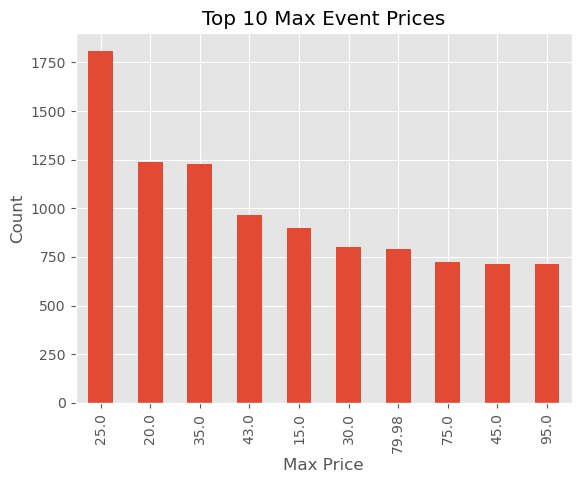

In [133]:
ax = df['Max_Price'].value_counts() \
    .head(10) \
    .plot(kind = 'bar', title = 'Top 10 Max Event Prices')
ax.set_xlabel('Max Price');
ax.set_ylabel('Count');


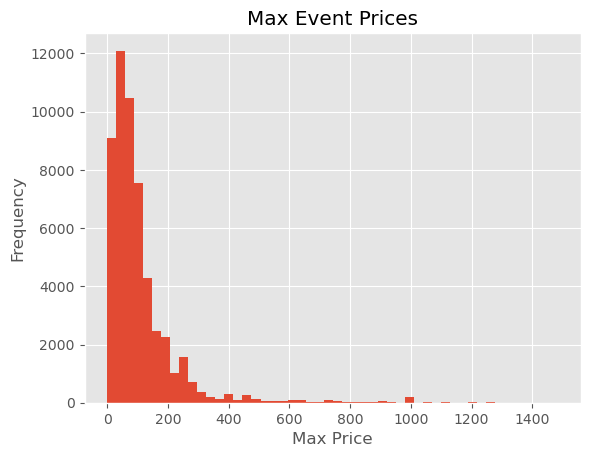

In [134]:
# plot distribution of max prices, removing outliers
no_outliers = df[df.Max_Price < 1500]
ax = no_outliers.Max_Price.plot(kind = 'hist', bins = 50, title = 'Max Event Prices');
ax.set_xlabel('Max Price');


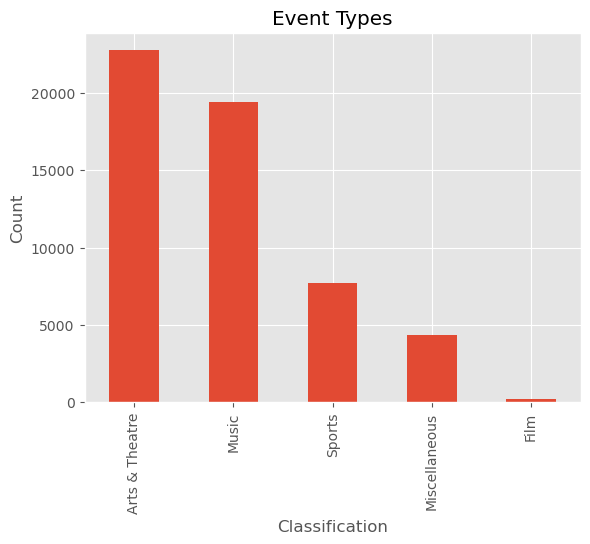

In [135]:
# plot distribution of event types
ax = df.Classification.value_counts().plot(kind = 'bar', title = 'Event Types');
ax.set_ylabel('Count');

In [136]:
# averages and medians of each classification
mean_med_prices = df[df.Classification != 'Miscellaneous'].groupby('Classification')['Max_Price'].agg(['mean', 'median']).round(2).sort_values(by = 'mean', ascending = False)
display(mean_med_prices)



,mean,median
Classification,,
Sports,366.68,70.00
Arts & Theatre,113.63,93.83
Music,94.74,59.50
Film,30.08,19.00


### Step 4: Feature Relationships

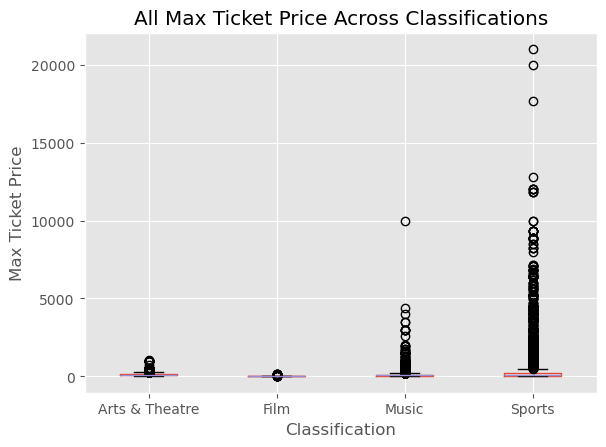

In [137]:
#upcoming events over time and their max prices with color coded by genre
ax = df[df.Classification != 'Miscellaneous'].boxplot(by = 'Classification');
plt.title('All Max Ticket Price Across Classifications')
ax.set_xlabel('Classification')
ax.set_ylabel('Max Ticket Price')
plt.suptitle('')
plt.show()



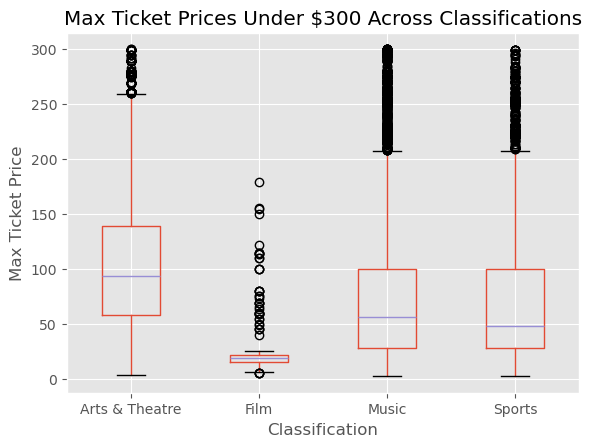

In [138]:
ax = df[(df.Max_Price < 300) & (df.Classification != 'Miscellaneous')].boxplot(by = 'Classification');
plt.title('Max Ticket Prices Under $300 Across Classifications')
ax.set_xlabel('Classification')
ax.set_ylabel('Max Ticket Price')
plt.suptitle('')
plt.show()

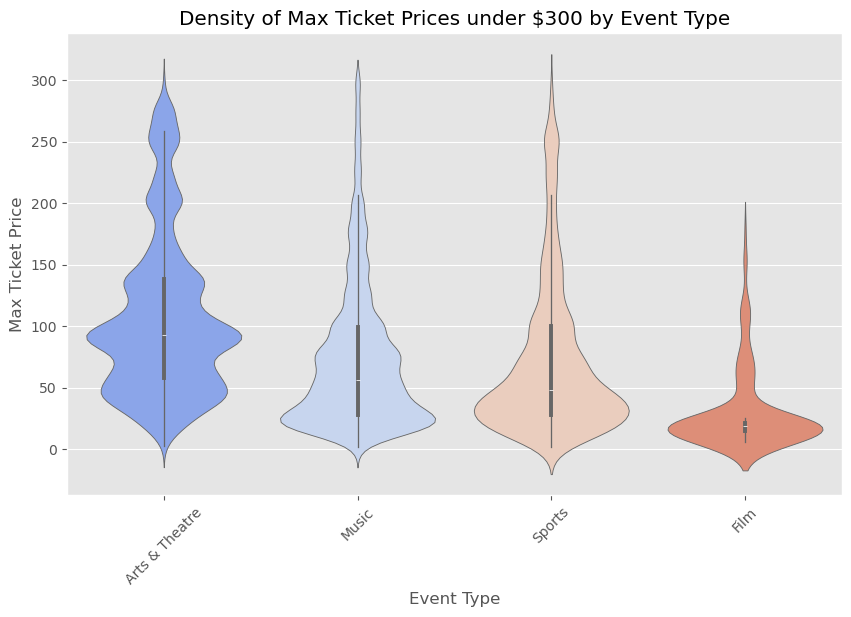

In [139]:
# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Classification', y='Max_Price', data=df[(df.Classification != 'Miscellaneous') & (df.Max_Price < 300)], palette='coolwarm')
plt.title('Density of Max Ticket Prices under $300 by Event Type')
plt.xlabel('Event Type')
plt.ylabel('Max Ticket Price')
plt.xticks(rotation=45)
plt.show()

In [143]:
# calculate upper limit of each category to understand outliers for each one and visualize them separately

# extract q1 and q3 quartiles for each category
q3 = []
q1 = []
classifications = ['Arts & Theatre', 'Film', 'Music', 'Sports']
for c in classifications:
    at_stats = df[df.Classification == f'{c}'].describe().reset_index()
    q3.append(at_stats[at_stats['index'] == '75%']['Max_Price'].iloc[0])
    q1.append(at_stats[at_stats['index'] == '25%']['Max_Price'].iloc[0])


# calculate upper limit for each class
upper_lim = []
for x in [0, 1, 2, 3]:
    u_lim = q3[x]+1.5*(q3[x] - q1[x])
    upper_lim.append(round(u_lim, 2))


outliers_count = []
percent_outliers = []
total_event_counts = []
for k,v in {0:'Arts & Theatre', 1:'Film', 2:'Music', 3:'Sports'}.items():
    outliers = df[(df['Max_Price'] > upper_lim[k]) & (df['Classification'] == v)]
    outliers_count.append(len(outliers))
    percent_outliers.append(str(round(len(outliers)/len(df[df.Classification == v])*100)) + "%")
    total_event_counts.append(round(len(df[df.Classification == v])))



# display as df
outliers_table = {'Classification': classifications, 'Total Number of Events': total_event_counts, 'Number of Outliers': outliers_count,
        '% of Total Events': percent_outliers, 'Upper Limit ($)': upper_lim}

# Create DataFrame
outliers_df = pd.DataFrame(outliers_table)


display(outliers_df.sort_values(by = 'Upper Limit ($)', ascending = False))


,Classification,Total Number of Events,Number of Outliers,% of Total Events,Upper Limit ($)
3,Sports,7720,1125,15%,505.00
0,Arts & Theatre,22759,1369,6%,258.30
2,Music,19437,1551,8%,208.25
1,Film,202,42,21%,31.50


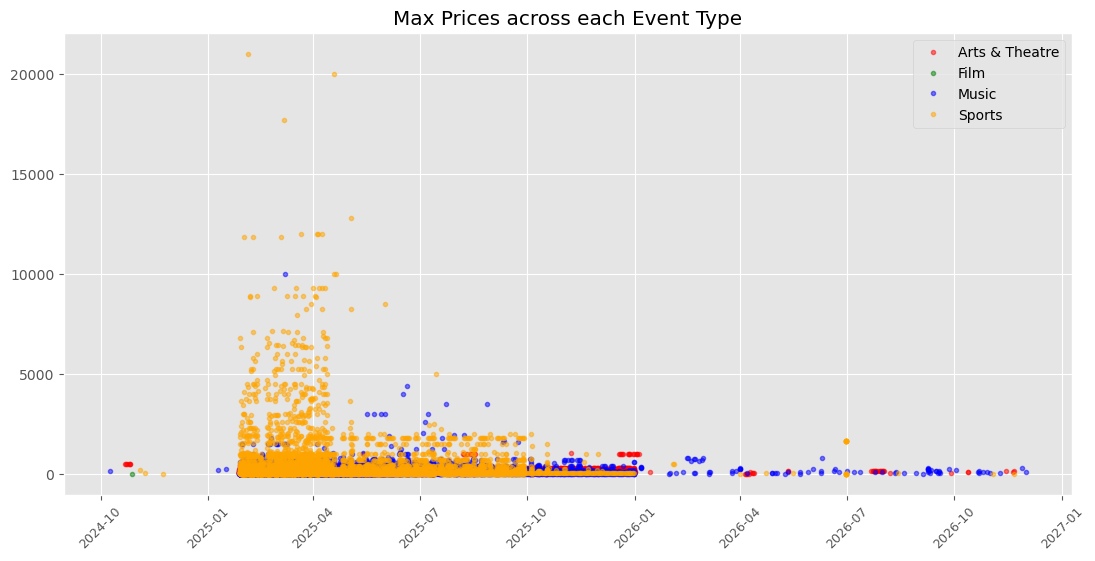

In [112]:
# plot scatter plot of max prices vs. their event dates and color code by category
df_no_misc = df[df.Classification != 'Miscellaneous']
grouped = df_no_misc.groupby('Classification')

# create color map for each group
color_map = {'Arts & Theatre': 'red', 'Film': 'green', 'Music': 'blue', 'Sports':'orange'}

# plot
fig, ax = plt.subplots(figsize = (13, 6))
ax.margins(0.05)
for name, group in grouped:
    ax.plot(group.Event_Start_Date, group.Max_Price, c = color_map[name], marker = 'o', linestyle = '', ms = 3, label = name, alpha = 0.5);
ax.legend();
plt.title('Max Prices across each Event Type')
# set x-axis locator to display ticks every month
#ax.xaxis.set_major_locator(mdates.MonthLocator())

# change x ticks size
plt.xticks(fontsize = 9, rotation = 45)
plt.show();



In [113]:
# calculate max of max prices and determine event
classifications = ['Sports', 'Music', 'Film', 'Arts & Theatre']
max_prices = []
max_events = []
for c in classifications:
    max_price = df[(df.Classification == c) & (df.Max_Price == max(df[df.Classification == c]['Max_Price']))]['Max_Price'].iloc[0]
    max_event_name = df[(df.Classification == c) & (df.Max_Price == max(df[df.Classification == c]['Max_Price']))]['Event_Name'].iloc[0]
    max_prices.append("$" + str(round(max_price)))
    max_events.append(max_event_name)


# display as df
max_table = {'Classification': classifications, 'Event Name': max_events,
        'Max Price': max_prices}

# Create DataFrame
max_df = pd.DataFrame(max_table)

# Set the display option to show all columns
pd.set_option('display.max_colwidth', None)

display(max_df)



,Classification,Event Name,Max Price
0,Sports,LA Clippers vs. Los Angeles Lakers,$21000
1,Music,Free Beer (the Band) Florida's #1 Party Band (A Tribute to The Rooster! Marcus Outzen former QB for FSU),$10000
2,Film,STOP MAKING SENSE: A Film by Jonathan Demme and Talking Heads,$179
3,Arts & Theatre,Kevin James: Owls Don't Walk,$1041


### Step 5: Ask a Question about the Data